---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 4 (Supervised Learning, Part II)

## Preamble and Datasets

<IPython.core.display.Javascript object>


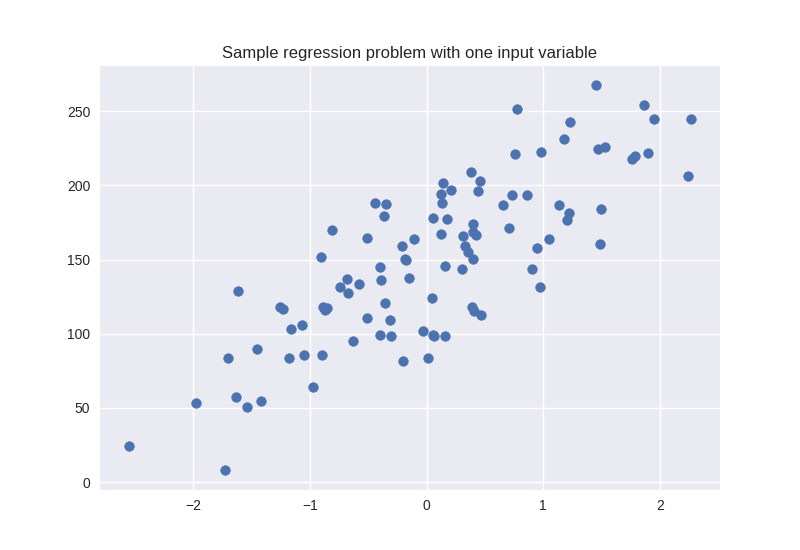

<IPython.core.display.Javascript object>


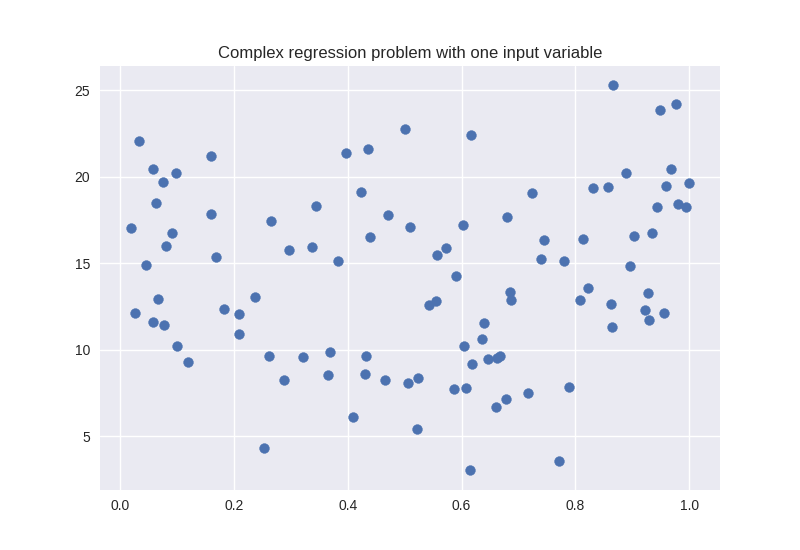

<IPython.core.display.Javascript object>


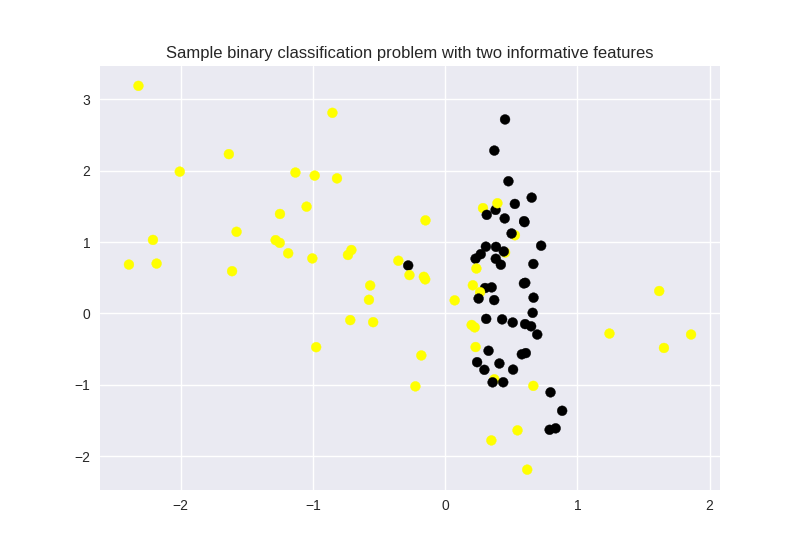

<IPython.core.display.Javascript object>


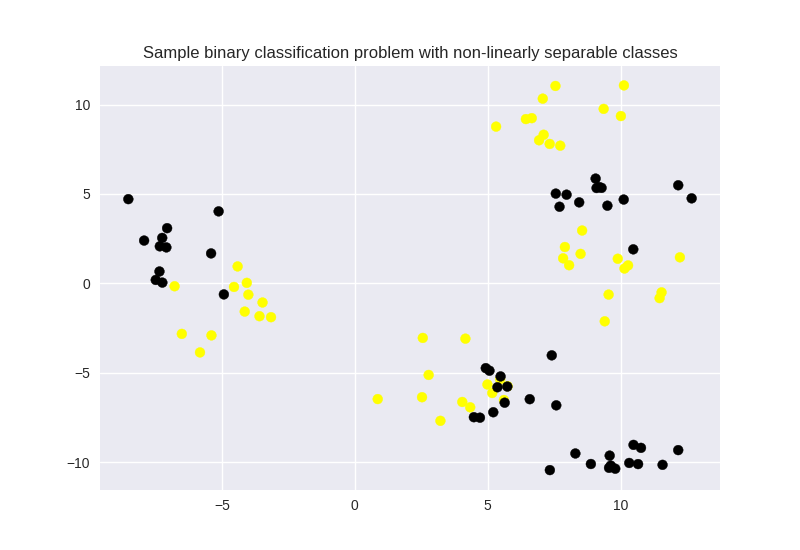

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## Naive Bayes classifiers

- They make the simplpifying assumptition that each feature of an instance is independent of all the others, that's why is called naive
- This is not always the case
- This assumes that for all instaces of a given class, the features have little/no correlation with each other
- Highly efficient learning and prediction
- But generalization performance may worse than more sophisticated learning methods
- Can be competitive for some tasks
- Three types:
    - Bernoulli: binary features 
    - Multinomial: discrete features 
    - Gaussian continuos/real-valued features
        - During training, this estmates for each feature the mean and standard deviation of the feature for each class 
        - For prediction, the classifier compares the features of the example data point to be predicted with the feature statistics for each class and selects the class that best matches the data point
        - It assumes that the data for each class was generated by a simple calss specific gaussian distribution 
        - Predict the class of a new data point corresponds mathematically to estimating the probability that each classes gaussian distribution was most likely to have generated the data point
        - Classifier than picks the class that has the highest probability 
        - in sklearn instanciate GaussianNB
        - It's worth noting that the Naive Bayes models are among a few classifiers in scikit learn that support a method called partial fit, which can be used instead of fit to train the classifier incrementally in case you're working with a huge data set that doesn't fit into memory. 
        - Typically, gaussian naive bayes is used for high-dimensional data, when each instance of the data has hundreds or thousands features.
        - It can be shown that naive bayes classifiers are related mathematically to linear models, so many of the pros and cons of linear models also apply to naive bayes 
        

<IPython.core.display.Javascript object>


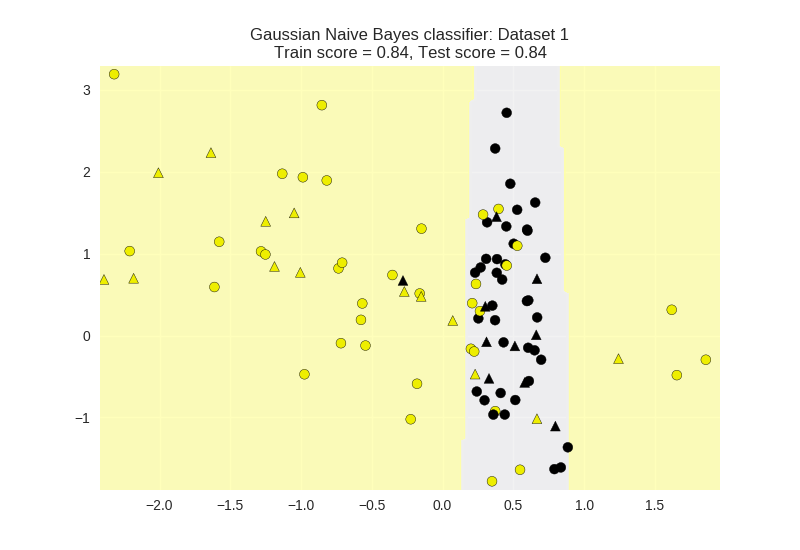

In [2]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

<IPython.core.display.Javascript object>


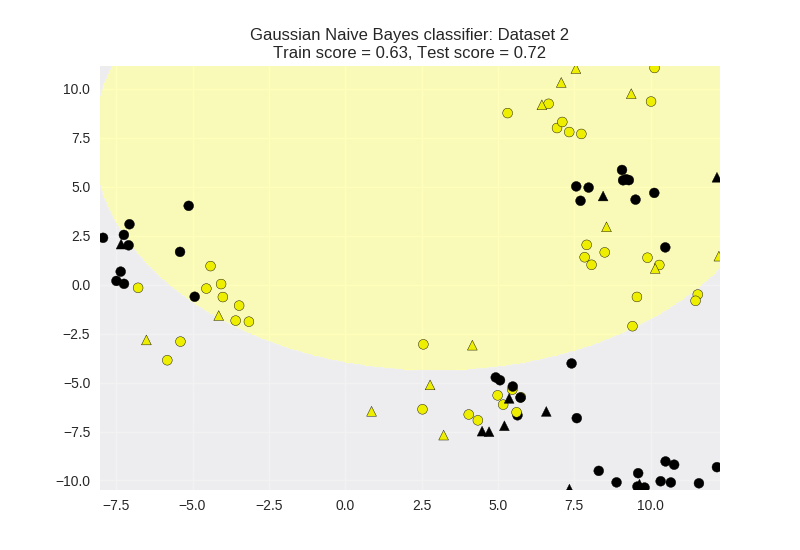

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 2')

### Application to a real-world dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


## Ensembles of Decision Trees

- An ensemble takes multiple individual learning models and combines them to produce an aggregate model that is more powerful than any of its individual learning models
- Why are ensembles effective? Well, one reason is that if we have different learning models, although each of them might perform well individually, they'll tend to make different kinds of mistakes on the data set. And typically, this happens because each individual model might overfit to a different part of the data. By combining different individual models into an ensemble, we can average out their individual mistakes to reduce the risk of overfitting while maintaining strong prediction performance. 

### Random forests

- An ensemble of tree, not just one tree
- Widely used, very good results on many problems
- one decision tree => prone to overfitting
- many decision tree => more stable, better generalization
- ensemble of trees should be diverse: introduce random variation into the process of building each decision tree
    - This random variation happens in two ways
        - the data used to build each tree is selected randomly 
        - the features chosen in each slit test are also randomly selected
    - model creation steps:
        - decide on how many trees to build. This is set using the n_estimated paramete
        - **bootstrap sample** is each sample of the data used to create each individual tree
- the max_features parameter:
    - learning is quite sensitive to this parameter
    - setting max_features = 1 leads to forests with diverse, more complex trees 
        - the random forest is limited to performing a split on the single feature that was selected randomly instead of being able to take the best split over several variables. 
    - setting max_features = '<'close number of features'>' will lead to similar forests with simples trees
- once a random forest model is trained it prpedicts the target value for new instances by first making a prediction for every tree in the random forest 
    - for regression tasks the overall prediction is then tipiclly the mean of the individual tree predictions
    - for classification the overall prediction is based on a weighted vote, in which, each tree gives a probability for each possible target class label then the probabilities for each class are everaged across all the trees and the class with the highest probability is the final predicteed class 
- Pros x cons
    - Pros:
        - Widely used, excellent prediction perfomance on many problems
        - doesn't require careful normalization of features or extensive parameter tuning 
        - like decision trees, handles a mixture of feature types
        - easily parallelized across multiple CPU
    - Cons:
        - The resulting models are often dificult for humans to interpret
        - Like decision trees, random forests maynot be a good chice for very-high dimensional tasks compared to fasr, accurate linear models
- Some key parameters:
    - n_estimators: number of trees to use in ensemble (default 10)
        - should be larger for larger datasets ro reduce overfitting
    - max-features: has a strong effect on performance. Influences the diversity of tress in the forest
        - dafault works well in practice, but adjusting may lead to some further gains
        - max_depht: controls the depth of each tree (default: None. Split until all leaves are pure)
        - n_jobs: how many cores to use in paralllel during training
        - choose a fized setting for the random_state parameter if you need reproducible results

<IPython.core.display.Javascript object>


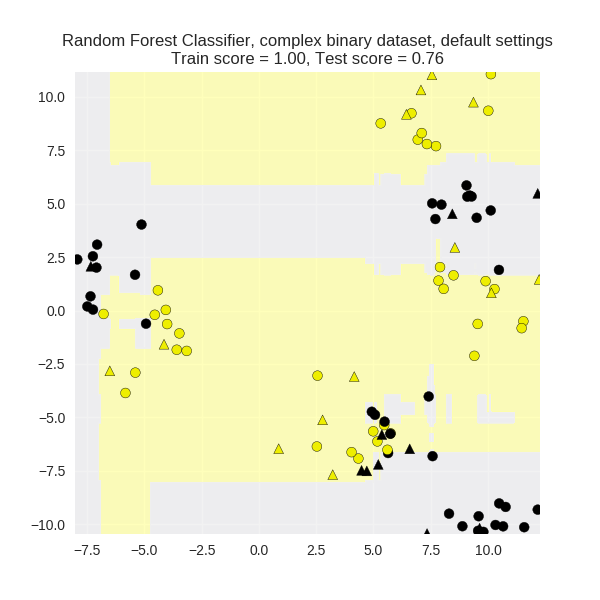

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

### Random forest: Fruit dataset

<IPython.core.display.Javascript object>


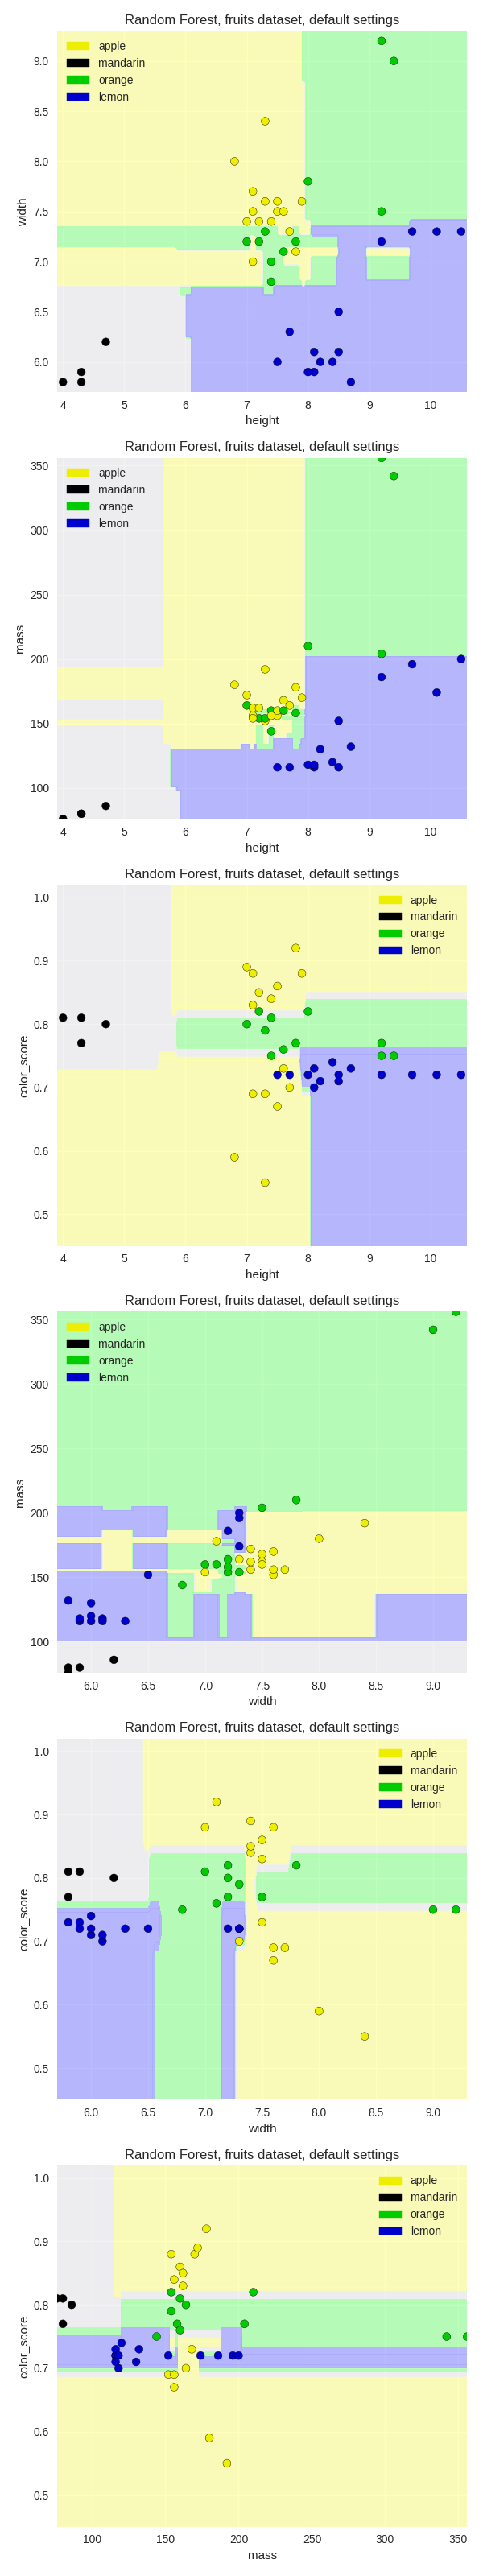

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Random Forests on a real-world dataset

In [7]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.99


### Gradient-boosted decision trees (GBDT)

- It's a tree based method
- use an ensemble of multiple trees
- unlike the random forest method this method build a series of trees (not parallel like random forest) where each tree is trained so that it attempts to correct the mistakes of the precious tree in the series
    - So, it uses lots of shallow trees (know as weak learners) built in a nonrandom way to create a model that makes fewer mistakes as more trees are added
- learning rate is a parameter that controls how the GBDT builds the series of collective trees
    - When the learning rate is high each successive tree put strong enphases on correting the mistakes of its predecessor. And thus may result in a more complex individual tree and model.
    - Default sklearn is 0.1
- Pros and cons
    - pros 
        - often best off-the-shelf accuracy on many problems
        - Using model for prediction requires only modest memory and is fast
        - doesn't require careful normalization of features to perform well
        - like decision trees, handles a mixture of features types
    - cons
        - Like random trees, the models are often difficult for humans to interpret
        - requires careful tuning of the learning rate and other parameters
        - training can require significant computation
        - like decision trees, nor recommenden for text classification and other problems with very high dimensional sparse features, for accuracy and computational reasons
- key parameters
    - n_estimators: sets numbers of small decision trees to use in the ensemble
    - learning_rate: controls emphasis on fixing errors from previous iteration
        - The above two are typically tuned together
    - n_estimators is adjusted first, to best exploit memory and CPUs during training, then otrhe parameters
    - max_depth: is tipically set to a small value for most appplications

<IPython.core.display.Javascript object>


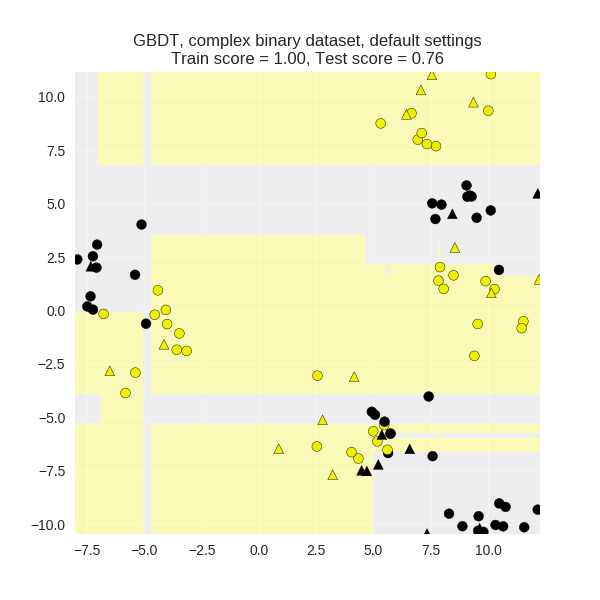

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

#### Gradient boosted decision trees on the fruit dataset

<IPython.core.display.Javascript object>


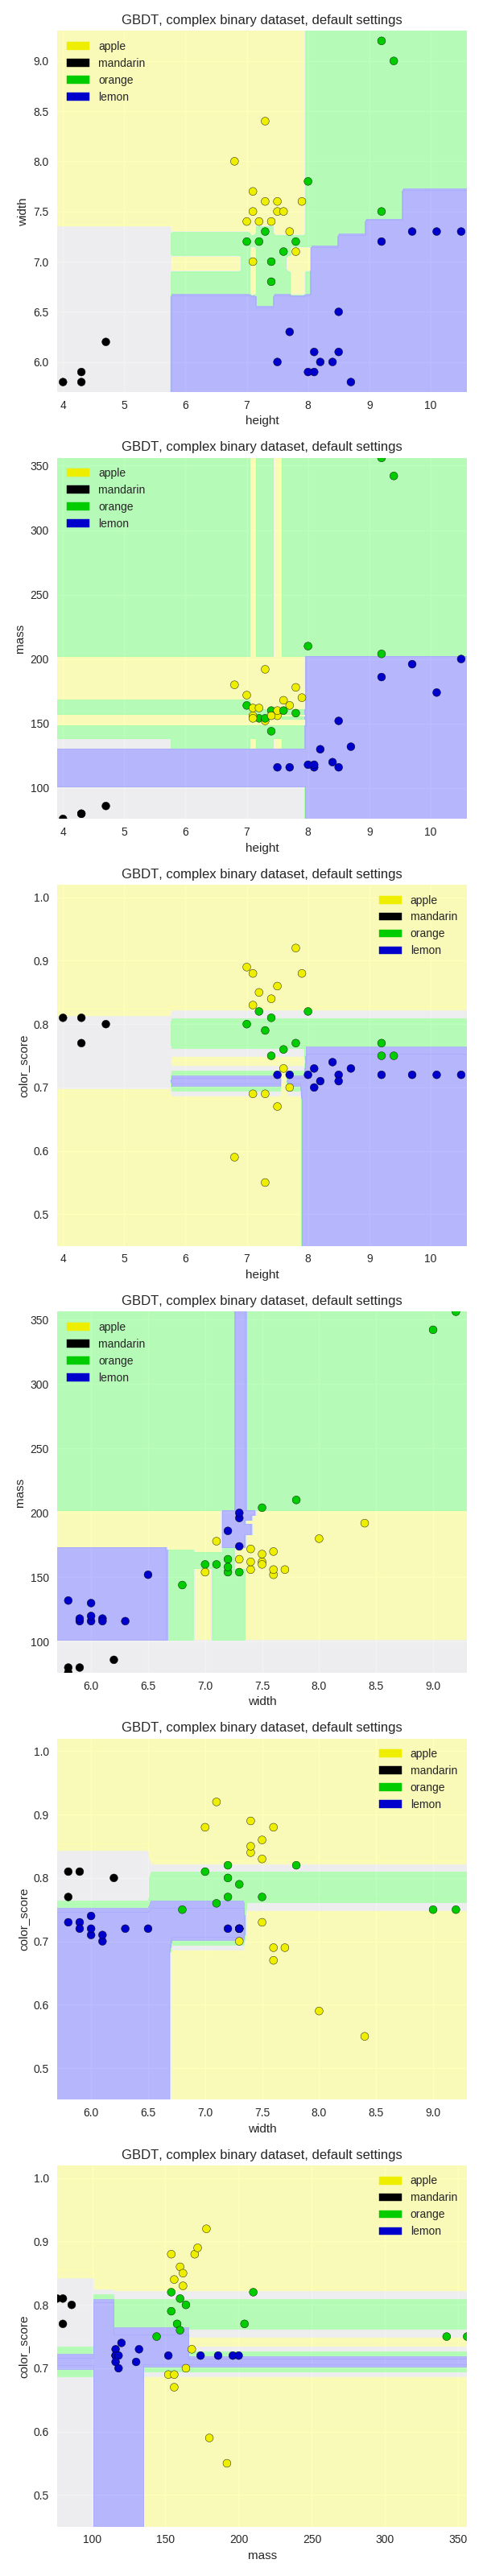

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Gradient-boosted decision trees on a real-world dataset

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.96

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


## Neural networks

- Multi-layer perceptron with one hidden layer (MLP)
    - gets the ideia of computing weighted sums of the input features. 
    - Adds an addictional processing setp called a hidden layer, that has hidden units. Eah unit in the hidden layer computes a nonlinear function of the weighted sums of the input features resulting in intermediate output values $v_0,\,v_1,\,v_2$. Then the MLP computes a weighted sum of these hidden unit outputs to form the final output value, $\hat{y}$:
        - $\hat{y}=v_0 h_0+ v_1 h_1 + v_2 h_2$
    - This nonlinear function that the hidden unit applies is called the activation function.
    - One can see that the result of adding this additional hidden layer processing step to the prediction model, is a formula for $\hat{y}$ that is already more involved than the one for logistic regression
    - Now, predicting y involves computing a different initial weighted sum of the input feature values for each hidden unit. Which applies a nonlinear activation function and all of these nonlinear outpurs are combined, using another weighted sum to produce y
    - This addition and combination of non-linear activation functions allows multi-layer perceptrons to learn more complex functions than is possible with a simple linea or logistic function
    - This additional expressive power enables neural networks to perform more accurate prediction when the relation between the input and output is itself complex
    - There are a number of choices for the activation function in a neural network that gets applied in hidden units 
    - the default activation function for neural networks in sktlearn  is the rectified linear unit function.
    - we can control the model complexity by adding a L2-regularization penalty parameter α on the weights.
    - Remember that L2-regularization penalizes models that have a large sum of squares of all the weights values
- Proc and cons:
    - pros:
        - they form the basis of state-of-art models and can be foemd into advanced achitectures that effectively capture complex features given enough data and computation
    - cons:
        - larger, more complex models require significant training time, data, and customization
        - careful preprocessing of the data is needed 
        - a good choice when the features are of similar types, but less so when features of very different types
- important parameters
    - hidden_layer_sizes: sets the number of hidden layers and number of hidden units per layer. default: 100
    - alpha: controls weight on the regularization penalty that shrinks weights to zero. default: 0.0001
    - activation: controls the nonlinear function used for the activation function, including: relu (default), logistic, tanh

#### Activation functions

<IPython.core.display.Javascript object>


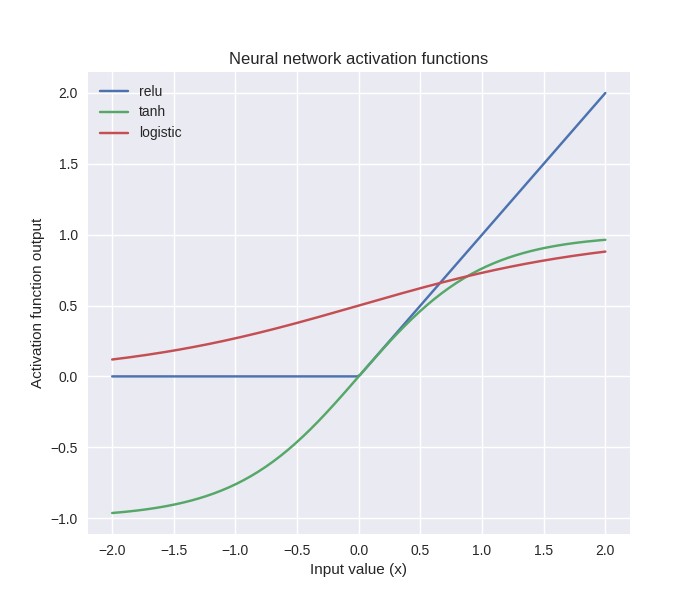

In [11]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

### Neural networks: Classification

#### Synthetic dataset 1: single hidden layer

<IPython.core.display.Javascript object>


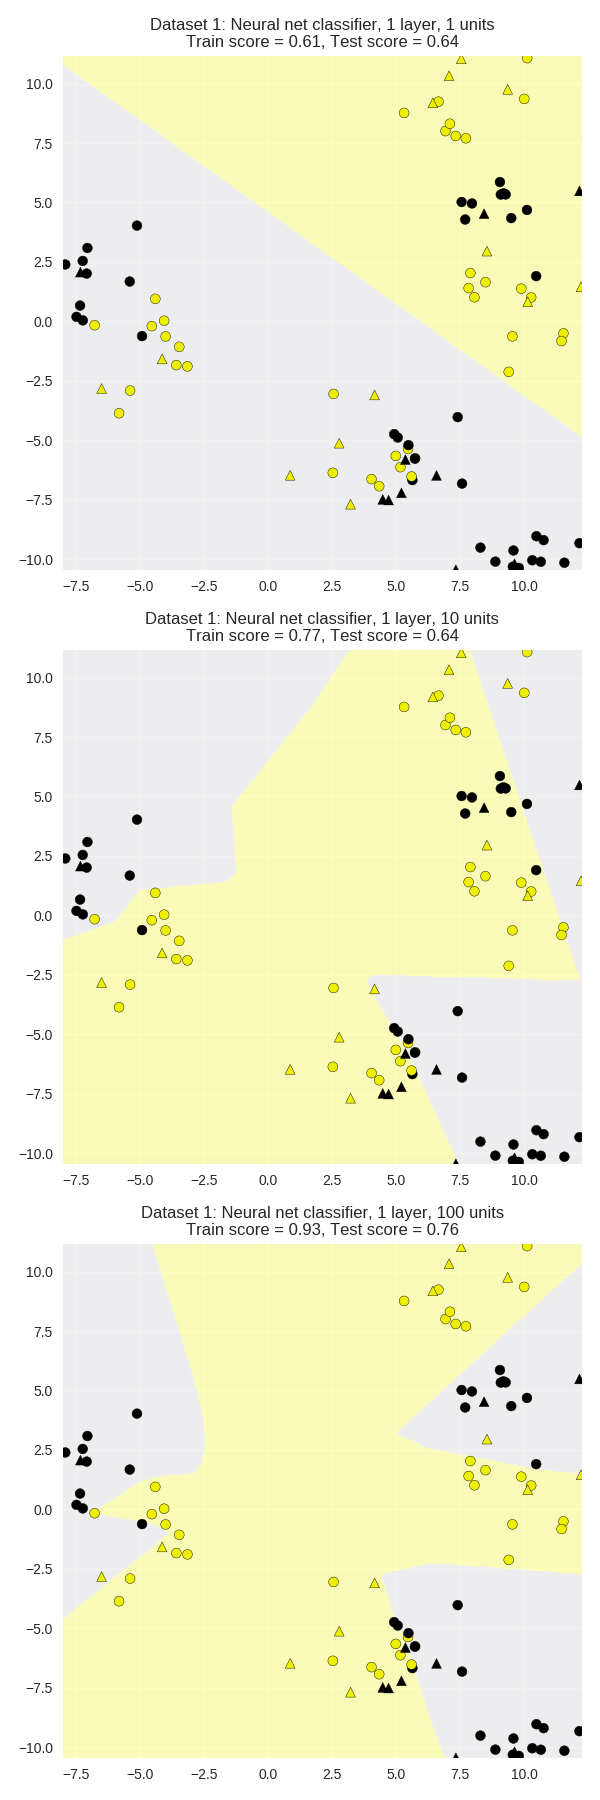

In [12]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

#### Synthetic dataset 1: two hidden layers

<IPython.core.display.Javascript object>


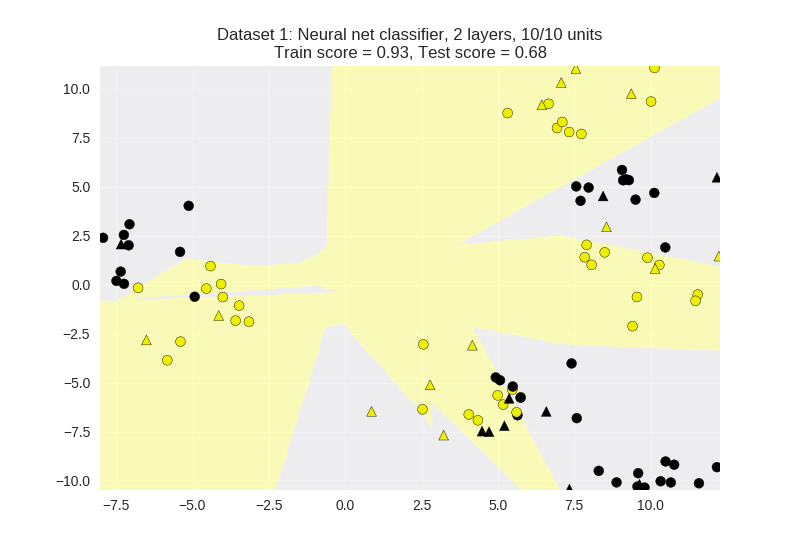

In [13]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

#### Regularization parameter: alpha

<IPython.core.display.Javascript object>


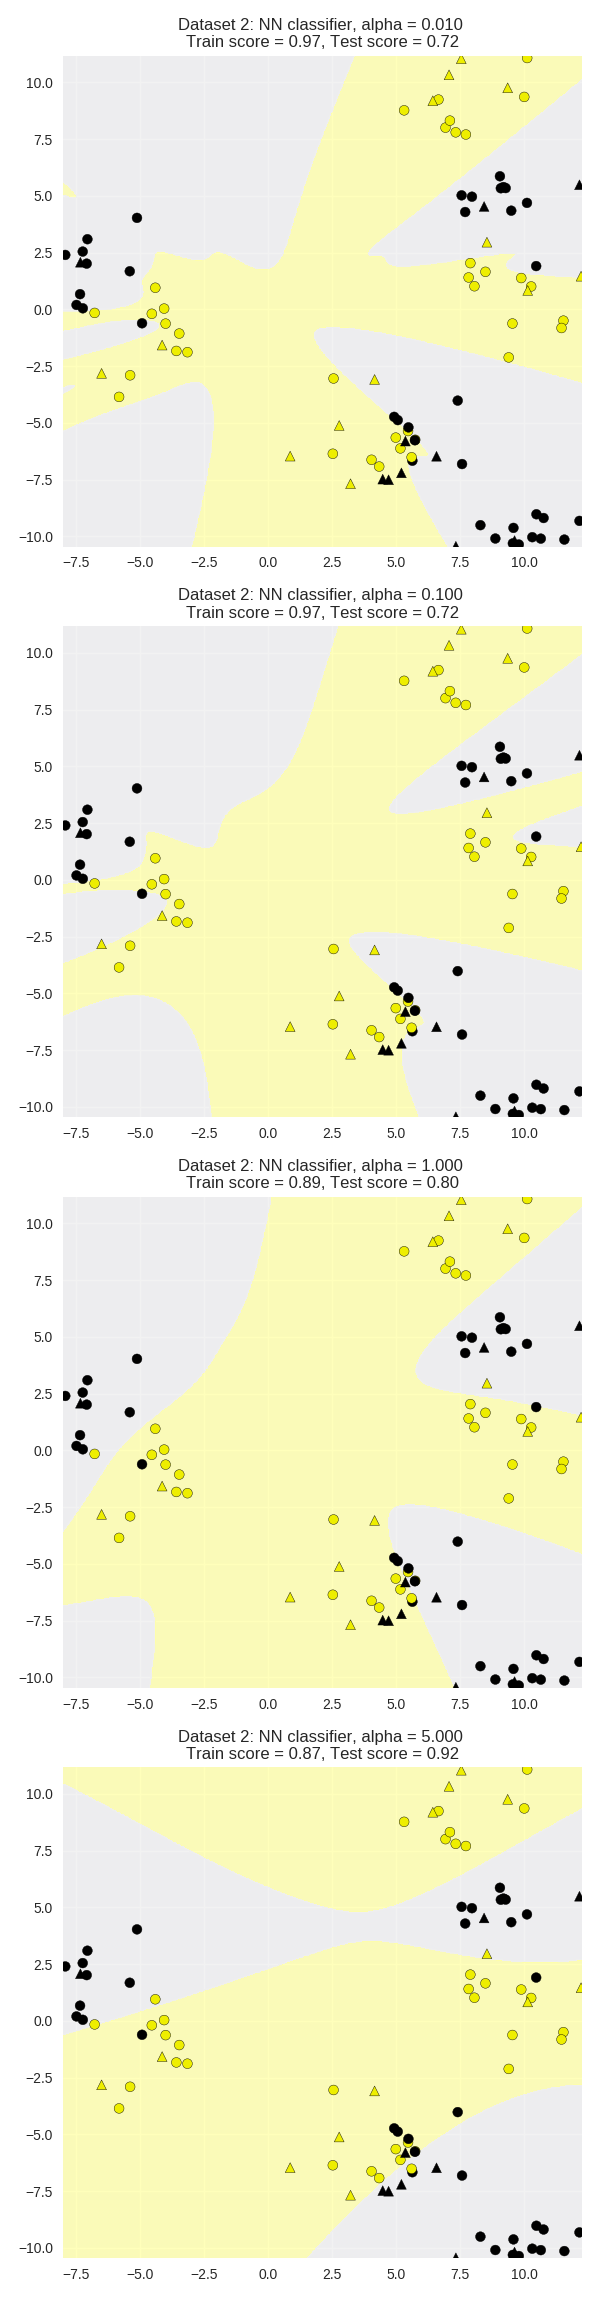

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    

#### The effect of different choices of activation function

<IPython.core.display.Javascript object>


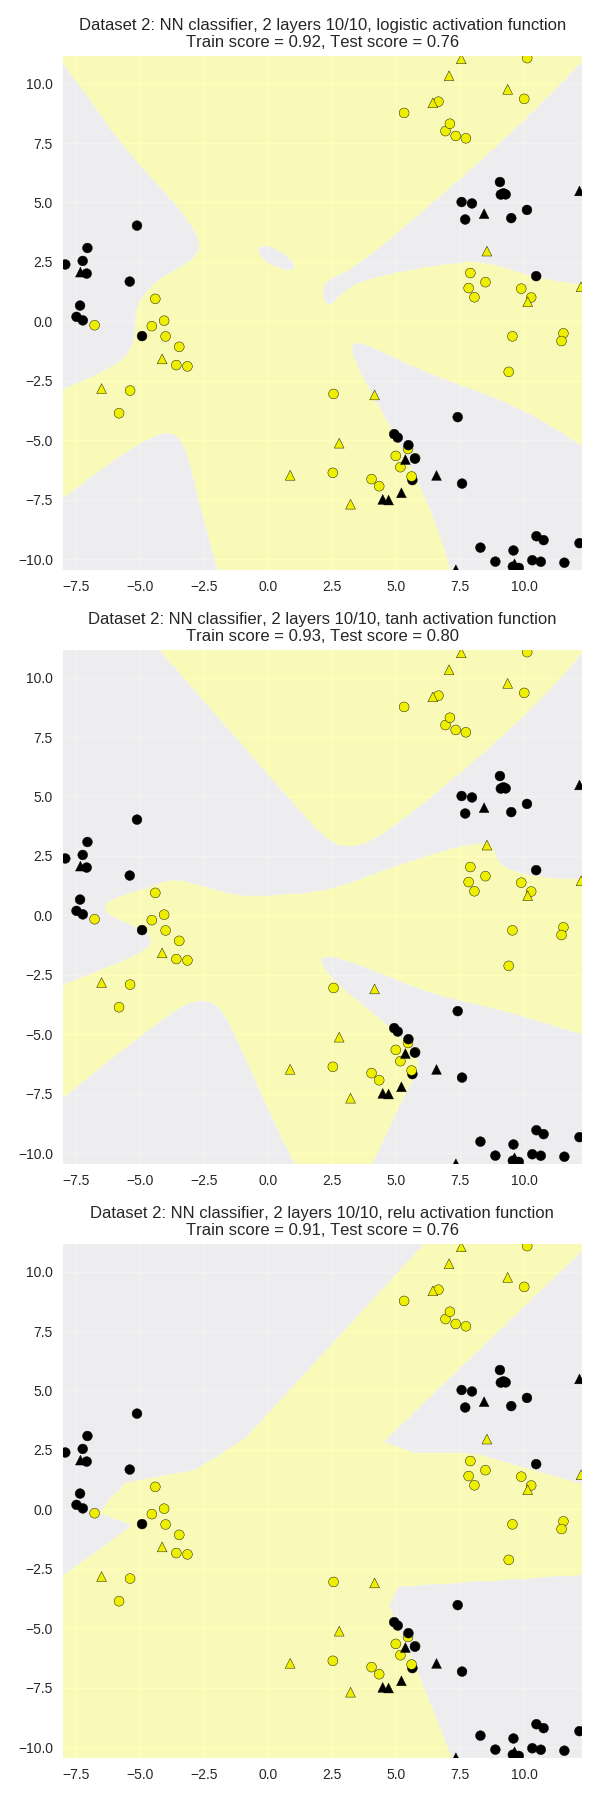

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [10, 10],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### Neural networks: Regression

<IPython.core.display.Javascript object>


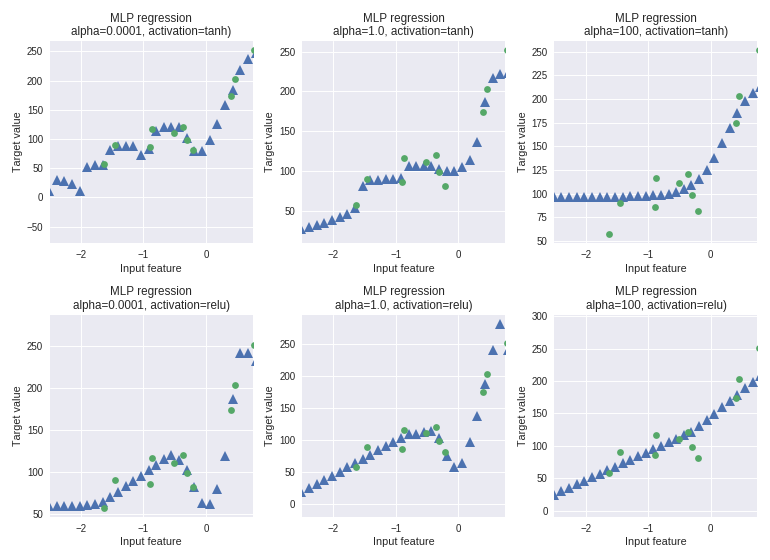

In [16]:
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

- You can see the smoothness of the activation function somewhat influences the smoothness of the corresponding regression results. 
- Along the columns, the plots also show the effect of using different alpha settings, to increase the amount of L2 regularization from left to right. Again, as with classification, the effect of increasing the amount of L2 regularization, by increasing alpha. Is to constrain the regression to use simpler and simpler models, with fewer and fewer large weights. 

#### Application to real-world dataset for classification

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97


**Feature engineering**
- Deep learning achitectures combine a sophisticated automatic feature extraction phase with a supervised learning phase
- the feature extraction phase uses a hierarchy of multiple feature extraction layers
- starting from primitive, low-level features in the inicial layer, each feature layer's output provide the input feature to the next higher feature layer
- all features are used in the final supervided learning model

# Data Leakage

- Describes the situation where the data you're using to train the machine leaning algorithm happens to include unexpected extra information about the very thing you're trying to predict
- Introducing information about the target during training that would not legitimately be available during actual use.
- Obvious examples:
    - including the label to be predicted as a feature
    - including test data with training data
- If your model performance is too good to be true, it probably is and likely due to "giveaway" feature
- It's difficult to do identify 
- It tipically causes results during your model development phase that are too optimistic, followed by the nasty surprise of disappointing results after the prediction modelis actually deployed and evaluated on new data.
- It's one of the main problem in data mining and machine learning
- More subtle examples of data leakage
    - prediction target: will user saty on a site, or leave?
        - giveaway feature: total session lenght, based on informaiton about future page visits
    - predicting if a user on a financial site is likely to open an account:
        - and account number field that's only filled in once the user does open an account
    - diagnostic test to predict a medical condition:
        - the existing patinent dataset contains a binary variable that happens to marke whether they had surgery for that condition
        - combinations of missing diagnosis codes that are not be available while the patient's condition was still being studied
        - the patient ID could contain information about specific diagnosis paths
    - Any of these leaked features is highly predictive of the target, but not legitimately available at the time prediction needs to be done
- Other examples:
    - Leakage in training data:
        - performing data preprocessing using parameters or results from analyzing the entire dataset: normalizing and rescaling, detecting and removing outliers, estimating missing values, feature selection.
        - time-series datasets: using records from the future when computing features for the current prediction
        - errors in data values/gathering or missing variable indicators can encode information about missing data that reveals information about the future
    - Lea in features:
        - Removing variables that are not legitimate without also removing variables that encode the same or related information\
        - reversing of intentional randomization or anonymization that reveals specific information about. e.g. users not legitimatel available in actual use
    - Any of the above could be present in any external data joined to the training set
- Detecting data leakage:
    - Before building the model:
        - exploratory data analysis to find surprises in the data
        - Are there features very highly correlated with the target value?
    - After building the model:
        - Look for surprising feature behavior if the fitted model
        - are there features with very high weights, or high informaiton gain?
        - simple rule-based models like decision trees can help with features like account numbers, patient IDs
        - is overall model performance surprisinglgt good compared to known results on the same dataset, or for similar problems on similar datasets?
    - Limited real-world deployment of the trained model
        - potentially  expensive in terms of development time, but more realistic
        - is the trained model generalizing well to new data?
- Minimizing data leakage:
    - perform data preparation within each cross-validation fold separately
    - With time series data, use timestamp cutoff 